## UAS PENGOLAHAN CITRA DETEKSI TEPI - EDGA SUKMA PRATAMA - 2213020040

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

#### Read gambar 


In [2]:
image_cv = cv2.imread("1.jpg") #BGR
#convert ke RGB
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)  
h, w, c = image_rgb.shape
print("Height:", h, "| Width:", w, "| Channels:", c)

Height: 808 | Width: 700 | Channels: 3


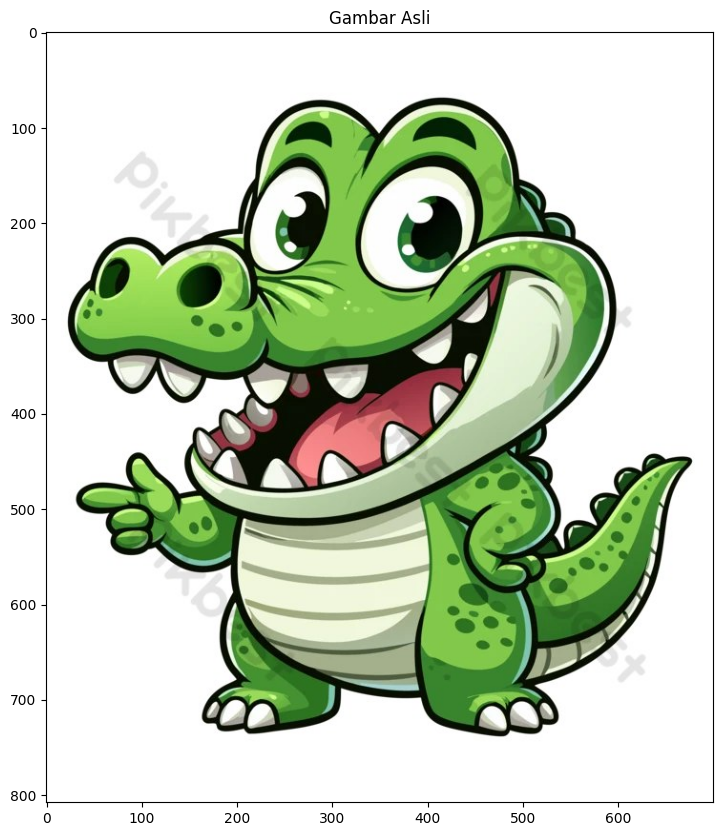

In [4]:
plt.figure(figsize=(10, 10))
plt.title("Gambar Asli")
plt.imshow(image_rgb)
plt.axis()
plt.show()

#### Konversi Grayscale

In [5]:
# Membuat array kosong untuk grayscale
grayscale_image = np.zeros((h, w), dtype=np.uint8)

# Konstanta untuk konversi ke grayscale
r_const, g_const, b_const = 0.299, 0.587, 0.114

In [6]:
# Melakukan iterasi Grayscale untuk seluruh piksel
for i in range(h):
    for j in range(w):
        r, g, b = image_rgb[i, j]
        gray_value = int(r_const * r + g_const * g + b_const * b)
        grayscale_image[i, j] = gray_value

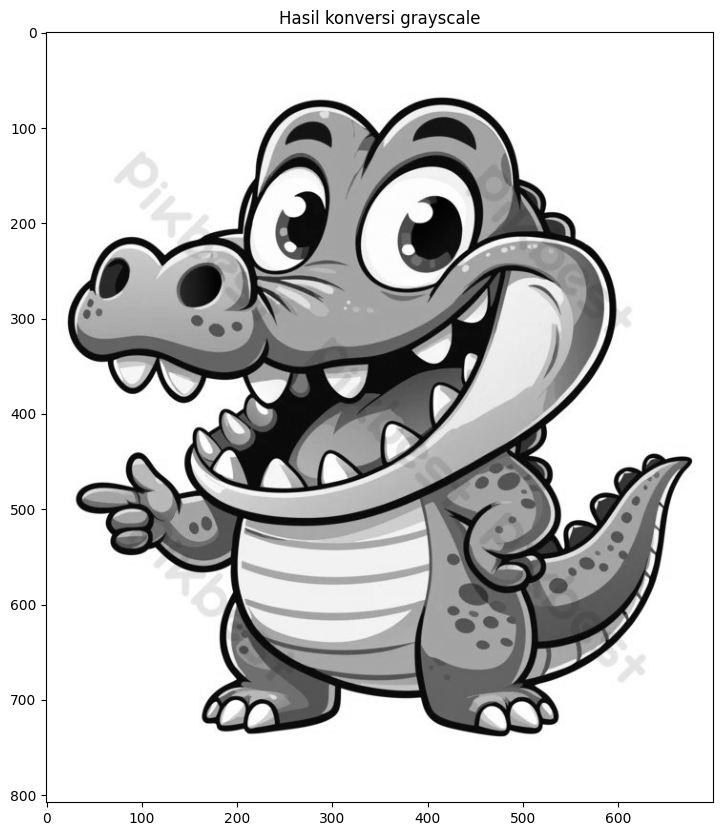

In [7]:
plt.figure(figsize=(10,10))
plt.title("Hasil konversi grayscale")
plt.imshow(grayscale_image, cmap='gray')
plt.axis()
plt.show()

#### Edge Detection Sobel

In [8]:
# Siapkan hasil
rows, cols = grayscale_image.shape
G_sobel = np.zeros((rows, cols), dtype=int)

In [9]:
# Padding untuk iterasi 3x3 dan kernel sobel
Gray_padded = np.pad(grayscale_image, ((1,1),(1,1)), mode='constant', constant_values=0)

Gx_kernel = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])

Gy_kernel = np.array([[-1, -2, -1],
                      [ 0,  0,  0],
                      [ 1,  2,  1]])

In [10]:
# Iterasi seluruh piksel (kecuali pinggir)
for y in range(1, rows + 1):
    for x in range(1, cols + 1):
        region = Gray_padded[y-1:y+2, x-1:x+2]
        gx = np.sum(Gx_kernel * region)
        gy = np.sum(Gy_kernel * region)
        G_sobel[y-1, x-1] = int(math.sqrt(gx**2 + gy**2))

In [15]:
G_sobel

array([[1081, 1020, 1020, ..., 1020, 1020, 1081],
       [1020,    0,    0, ...,    0,    0, 1020],
       [1020,    0,    0, ...,    0,    0, 1020],
       ...,
       [1020,    0,    0, ...,    0,    0, 1020],
       [1020,    0,    0, ...,    0,    0, 1020],
       [1081, 1020, 1020, ..., 1020, 1020, 1081]])

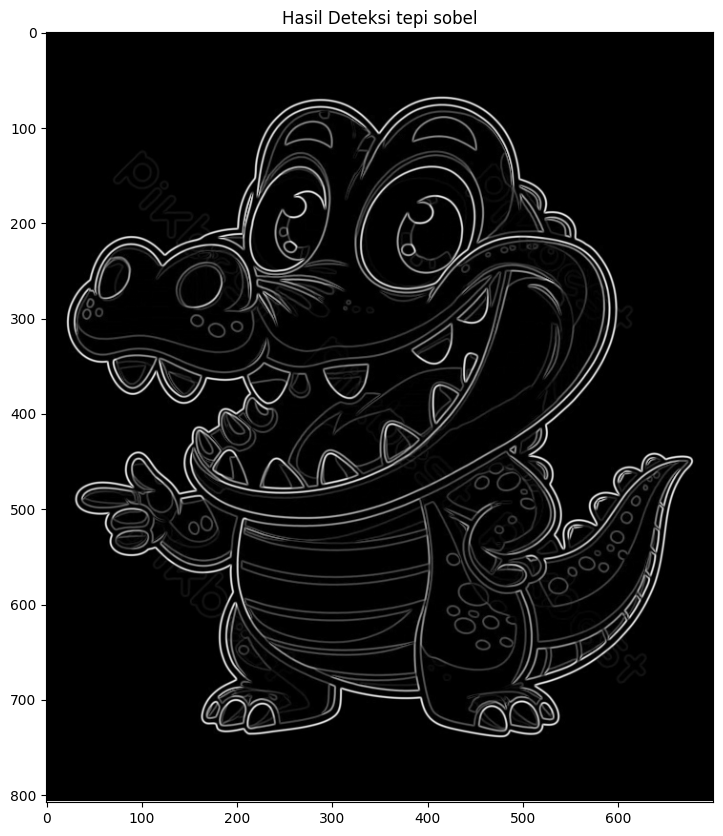

In [16]:
# Normalisasi dan visualisasi
edge_sobel= np.clip(G_sobel / G_sobel.max() * 255, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.title("Hasil Deteksi tepi sobel")
plt.imshow(edge_sobel, cmap='gray')
plt.axis()
plt.show()

In [17]:
edge_sobel

array([[255, 240, 240, ..., 240, 240, 255],
       [240,   0,   0, ...,   0,   0, 240],
       [240,   0,   0, ...,   0,   0, 240],
       ...,
       [240,   0,   0, ...,   0,   0, 240],
       [240,   0,   0, ...,   0,   0, 240],
       [255, 240, 240, ..., 240, 240, 255]], dtype=uint8)